In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def load_data(s):
    return pd.read_csv(s)
    


In [22]:
df = load_data("D:\Projects\hr-analytics-project\hr-analytics-project\docs\Software_Salaries.csv")

In [4]:
df.shape

(100000, 18)

In [5]:
df.isna().sum()

job_title                  0
experience_level       20000
employment_type        23984
company_size               0
company_location           0
remote_ratio               0
salary_currency            0
years_experience           0
base_salary                0
bonus                      0
stock_options              0
total_salary               0
salary_in_usd              0
currency                   0
education             100000
skills                100000
conversion_rate            0
adjusted_total_usd         0
dtype: int64

In [23]:
df.drop(["education" , "skills"] , axis = 1 ,inplace = True)

In [24]:
df

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,68407.451747,1100,19325,88832.451747,1065.989421,USD,1.000,88832.451747
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,64193.117775,2194,19164,85551.117775,111216.453107,EUR,1.100,94106.229552
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,136071.842899,3206,12735,152012.842899,167214.127189,EUR,1.100,167214.127189
3,Software Engr,Lead,Full-time,Large,India,50,INR,7,141850.905335,9594,11158,162602.905335,19512.348640,USD,1.000,162602.905335
4,Software Engr,Lead,Intern,Large,Germany,100,INR,10,121841.163226,6796,806,129443.163226,1553.317959,INR,0.012,1553.317959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,75331.984608,3260,29331,107922.984608,118715.283069,USD,1.000,107922.984608
99996,ML Enginer,Senior,Contract,Medium,Canada,50,USD,4,106416.051623,5777,477,112670.051623,112670.051623,EUR,1.100,123937.056785
99997,Machine Learning Engr,Senior,Part-time,Medium,UK,50,GBP,2,103315.889785,9638,24124,137077.889785,178201.256720,USD,1.000,137077.889785
99998,Research Scientist,Junior,Intern,Medium,Remote,100,CAD,14,37493.261693,8990,27729,74212.261693,55659.196269,CAD,0.750,55659.196269


In [25]:
df["job_title"].value_counts()

job_title
Data Analyst             16857
DevOps Engineer          16764
Research Scientist       16552
Sofware Engneer           5755
Software Engr             5622
Dt Scientist              5574
Softwre Engineer          5574
Data Scienist             5564
ML Engr                   5512
Data Scntist              5499
ML Enginer                5445
Machine Learning Engr     5282
Name: count, dtype: int64

In [26]:
def sanitize_job_title(s):

    sanitize_job_title_dict = {
    "Data Analyst" : ["Data Analyst"],
    "DevOps Engineer" : ["DevOps Engineer"],
    "Research Scientist" : ["Research Scientist"],
    "Software Engineer" : ["Sofware Engneer" , "Software Engr" , "Softwre Engineer","Software Engineer"],
    "Data Scientist" : ["Dt Scientist" , "Data Scienist" , "Data Scntist" , "Data Scientist"],
    "ML Engineer" : ["ML Engr" , "ML Enginer" , "Machine Learning Engr" , "ML Engineer"]
    }

    for key, val in sanitize_job_title_dict.items():
        if s in val:
            return key

    return "Not Determinable"


df["job_title"] = df["job_title"].apply(sanitize_job_title)


In [27]:
df.isna().sum()

job_title                 0
experience_level      20000
employment_type       23984
company_size              0
company_location          0
remote_ratio              0
salary_currency           0
years_experience          0
base_salary               0
bonus                     0
stock_options             0
total_salary              0
salary_in_usd             0
currency                  0
conversion_rate           0
adjusted_total_usd        0
dtype: int64

In [12]:
df[["experience_level","years_experience" , "company_size"]].loc[(df["years_experience"] > 13) & (df["company_size"]=="Small")].value_counts()

experience_level  years_experience  company_size
Senior            17                Small           415
                  14                Small           367
                  16                Small           363
Lead              18                Small           362
Senior            15                Small           351
Junior            18                Small           348
Mid               15                Small           347
Junior            16                Small           343
Senior            18                Small           341
Mid               17                Small           339
Lead              15                Small           333
Junior            20                Small           332
                  15                Small           328
                  19                Small           324
Lead              16                Small           322
Mid               16                Small           320
Junior            14                Small           319

In [28]:
plt.hist(df["adjusted_total_usd"])

(array([91996.,   261.,  1220.,  1381.,  1342.,  1219.,   932.,   985.,
          440.,   224.]),
 array([1.64789649e+02, 4.10982301e+05, 8.21799812e+05, 1.23261732e+06,
        1.64343483e+06, 2.05425234e+06, 2.46506986e+06, 2.87588737e+06,
        3.28670488e+06, 3.69752239e+06, 4.10833990e+06]),
 <BarContainer object of 10 artists>)

In [16]:
df["company_location"].value_counts()

company_location
UK         17087
Remote     16704
USA        16630
Canada     16558
India      16511
Germany    16510
Name: count, dtype: int64

In [35]:
df["conversion_rate"].unique()

array([1.   , 1.1  , 0.012, 0.75 , 1.3  ])

In [36]:
df

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,68407.451747,1100,19325,88832.451747,1065.989421,USD,1.000,88832.451747
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,64193.117775,2194,19164,85551.117775,111216.453107,EUR,1.100,94106.229552
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,136071.842899,3206,12735,152012.842899,167214.127189,EUR,1.100,167214.127189
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,141850.905335,9594,11158,162602.905335,19512.348640,USD,1.000,162602.905335
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,121841.163226,6796,806,129443.163226,1553.317959,INR,0.012,1553.317959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,75331.984608,3260,29331,107922.984608,118715.283069,USD,1.000,107922.984608
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,106416.051623,5777,477,112670.051623,112670.051623,EUR,1.100,123937.056785
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,103315.889785,9638,24124,137077.889785,178201.256720,USD,1.000,137077.889785
99998,Research Scientist,Junior,Intern,Medium,Remote,100,CAD,14,37493.261693,8990,27729,74212.261693,55659.196269,CAD,0.750,55659.196269


<h4>Currency and Company size wise mean</h4>

In [23]:
df.groupby(["currency","company_size"])["adjusted_total_usd"].mean()

currency  company_size
CAD       Large           227379.845905
          Medium          213017.808587
          Small           219575.929959
EUR       Large           324999.883931
          Medium          321722.815523
          Small           320818.610299
GBP       Large           394621.196272
          Medium          377632.468278
          Small           373503.308055
INR       Large             3546.243732
          Medium            3390.263065
          Small             3607.031191
USD       Large           297733.009830
          Medium          296959.299781
          Small           294789.125981
Name: adjusted_total_usd, dtype: float64

<h4 style="color:yellow;">From the below , we can understand that Irrespective of the company loaction , Pay depends on the currenvy<h4>

In [38]:
df.groupby(["currency"])["adjusted_total_usd"].mean()

currency
CAD    219991.928317
EUR    322480.712074
GBP    381859.739448
INR      3515.068880
USD    296484.596531
Name: adjusted_total_usd, dtype: float64

In [29]:
adj_total_usd = df["adjusted_total_usd"]

In [30]:
adj_total_usd

0         88832.451747
1         94106.229552
2        167214.127189
3        162602.905335
4          1553.317959
             ...      
99995    107922.984608
99996    123937.056785
99997    137077.889785
99998     55659.196269
99999     57332.998343
Name: adjusted_total_usd, Length: 100000, dtype: float64

In [ ]:
df_clean = pd.read_csv("data_partial_cleaned.csv")

In [ ]:
df_clean.drop()

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,68407.451747,1100,19325,88832.451747,1065.989421,USD,1.000,88832.451747
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,64193.117775,2194,19164,85551.117775,111216.453107,EUR,1.100,94106.229552
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,136071.842899,3206,12735,152012.842899,167214.127189,EUR,1.100,167214.127189
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,141850.905335,9594,11158,162602.905335,19512.348640,USD,1.000,162602.905335
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,121841.163226,6796,806,129443.163226,1553.317959,INR,0.012,1553.317959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,75331.984608,3260,29331,107922.984608,118715.283069,USD,1.000,107922.984608
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,106416.051623,5777,477,112670.051623,112670.051623,EUR,1.100,123937.056785
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,103315.889785,9638,24124,137077.889785,178201.256720,USD,1.000,137077.889785
99998,Research Scientist,Junior,Intern,Medium,Remote,100,CAD,14,37493.261693,8990,27729,74212.261693,55659.196269,CAD,0.750,55659.196269


<h4 style="color:yellow">Consider salary_currency and salary_in_usd. Adjusted usd makes no sense</h4>

In [44]:
df.groupby(["salary_currency" , "company_location"])["salary_in_usd"].mean()

salary_currency  company_location
CAD              Canada               93894.173919
                 Germany              94220.148276
                 India                93473.195571
                 Remote               93672.428959
                 UK                   95592.654713
                 USA                  92168.257202
EUR              Canada              135419.280920
                 Germany             142617.862136
                 India               133005.631435
                 Remote              137230.274672
                 UK                  129350.980035
                 USA                 144869.885848
GBP              Canada              151467.911539
                 Germany             158696.991485
                 India               160775.310433
                 Remote              154146.177138
                 UK                  164358.293338
                 USA                 153872.861475
INR              Canada                1542.7876

In [2]:
df_clean = pd.read_csv("data_partial_cleaned.csv")

In [3]:
df_clean

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,base_salary,bonus,stock_options,total_salary,salary_in_usd,currency,conversion_rate,adjusted_total_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,68407.451747,1100,19325,88832.451747,1065.989421,USD,1.000,88832.451747
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,64193.117775,2194,19164,85551.117775,111216.453107,EUR,1.100,94106.229552
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,136071.842899,3206,12735,152012.842899,167214.127189,EUR,1.100,167214.127189
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,141850.905335,9594,11158,162602.905335,19512.348640,USD,1.000,162602.905335
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,121841.163226,6796,806,129443.163226,1553.317959,INR,0.012,1553.317959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,75331.984608,3260,29331,107922.984608,118715.283069,USD,1.000,107922.984608
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,106416.051623,5777,477,112670.051623,112670.051623,EUR,1.100,123937.056785
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,103315.889785,9638,24124,137077.889785,178201.256720,USD,1.000,137077.889785
99998,Research Scientist,Junior,Intern,Medium,Remote,100,CAD,14,37493.261693,8990,27729,74212.261693,55659.196269,CAD,0.750,55659.196269


In [4]:
df_clean.drop(["adjusted_total_usd" , "conversion_rate" , "currency" , "base_salary" , "bonus" , "stock_options" , "total_salary"] , axis=1 , inplace=True)

In [5]:
df_clean

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,salary_in_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,1065.989421
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,111216.453107
2,Research Scientist,Lead,NaN,Medium,Germany,0,EUR,19,167214.127189
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,19512.348640
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,1553.317959
...,...,...,...,...,...,...,...,...,...
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,118715.283069
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,112670.051623
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,178201.256720
99998,Research Scientist,Junior,Intern,Medium,Remote,100,CAD,14,55659.196269


In [6]:
df_clean.dropna(inplace=True)

In [7]:
df_clean

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,salary_in_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,1065.989421
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,111216.453107
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,19512.348640
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,1553.317959
5,Data Analyst,Mid,Contract,Large,UK,0,EUR,14,95578.434242
...,...,...,...,...,...,...,...,...,...
99994,ML Engineer,Junior,Intern,Large,USA,50,GBP,18,54090.435535
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,118715.283069
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,112670.051623
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,178201.256720


In [8]:
df_clean[["remote_ratio" , "years_experience" , "salary_in_usd"]].corr()

,remote_ratio,years_experience,salary_in_usd
remote_ratio,1.000000,-0.006261,0.006131
years_experience,-0.006261,1.000000,-0.002900
salary_in_usd,0.006131,-0.002900,1.000000


<Axes: >

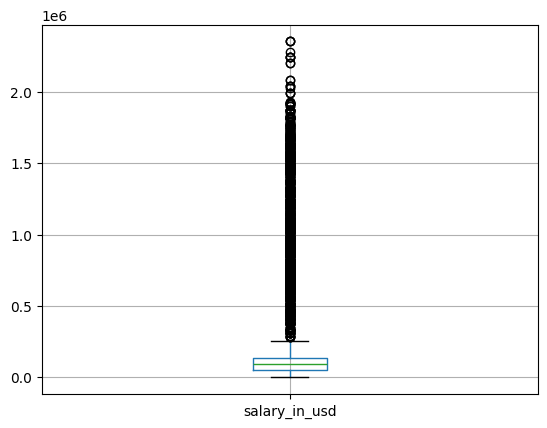

In [9]:
df_clean.boxplot(["salary_in_usd"])

In [10]:
import pandas as pd

# Assuming df_clean is already defined and cleaned

# Calculate Q1 and Q3
Q1 = df_clean["salary_in_usd"].quantile(0.25)
Q3 = df_clean["salary_in_usd"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_clean[(df_clean["salary_in_usd"] < lower_bound) | (df_clean["salary_in_usd"] > upper_bound)]

# Number of outliers
print("Number of outliers:", len(outliers))


Number of outliers: 1198


In [11]:
outliers.head()

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,salary_in_usd
48,DevOps Engineer,Mid,Part-time,Small,Canada,100,EUR,6,9.396245e+05
51,Data Scientist,Mid,Full-time,Medium,Canada,100,USD,18,8.214574e+05
61,Data Scientist,Lead,Intern,Medium,Germany,100,EUR,8,1.483510e+06
191,Data Analyst,Mid,Part-time,Large,India,50,CAD,15,7.803305e+05
318,Research Scientist,Junior,Intern,Large,USA,0,CAD,20,4.230770e+05


In [12]:
df_clean

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,salary_in_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,1065.989421
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,111216.453107
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,19512.348640
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,1553.317959
5,Data Analyst,Mid,Contract,Large,UK,0,EUR,14,95578.434242
...,...,...,...,...,...,...,...,...,...
99994,ML Engineer,Junior,Intern,Large,USA,50,GBP,18,54090.435535
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,118715.283069
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,112670.051623
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,178201.256720


In [14]:
df_clean.columns

Index(['job_title', 'experience_level', 'employment_type', 'company_size',
       'company_location', 'remote_ratio', 'salary_currency',
       'years_experience', 'salary_in_usd'],
      dtype='object')

In [16]:
df_clean["company_size"].value_counts()


company_size
Medium    25575
Small     25532
Large     24909
Name: count, dtype: int64

,job_title,experience_level,employment_type,company_size,company_location,remote_ratio,salary_currency,years_experience,salary_in_usd
0,Data Analyst,Mid,Contract,Medium,Germany,0,INR,13,1065.989421
1,DevOps Engineer,Mid,Contract,Small,India,100,GBP,9,111216.453107
3,Software Engineer,Lead,Full-time,Large,India,50,INR,7,19512.348640
4,Software Engineer,Lead,Intern,Large,Germany,100,INR,10,1553.317959
5,Data Analyst,Mid,Contract,Large,UK,0,EUR,14,95578.434242
...,...,...,...,...,...,...,...,...,...
99994,ML Engineer,Junior,Intern,Large,USA,50,GBP,18,54090.435535
99995,DevOps Engineer,Mid,Full-time,Large,India,50,EUR,14,118715.283069
99996,ML Engineer,Senior,Contract,Medium,Canada,50,USD,4,112670.051623
99997,ML Engineer,Senior,Part-time,Medium,UK,50,GBP,2,178201.256720


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

df = pd.read_csv("data_partial_cleaned.csv")
# df.dropna(inplace=True)

# === Ordinal mappings ===
ordinal_mappings = {
    'experience_level': {
        'Intern': 0, 'Entry-level': 1, 'Mid': 2, 'Senior': 3, 'Lead': 4, 'Executive': 5, 'Unknown': -1
    },
    'employment_type': {
        'Intern': 0, 'Part-time': 1, 'Contract': 2, 'Freelance': 3, 'Full-time': 4, 'Unknown': -1
    },
    'company_size': {
        'Small': 0, 'Medium': 1, 'Large': 2,'Unknown': -1
    }
}

# === Custom Transformer for Ordinal Mapping ===
class OrdinalMapTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings, columns):
        self.mappings = mappings
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns)
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mappings[col]).fillna(-1).astype(int)
        return X_copy.values  # Return array for compatibility

# === Column Definitions ===
ordinal_cols = ['experience_level', 'employment_type', 'company_size']
nominal_cols = ['job_title', 'company_location', 'salary_currency']
numeric_cols = ['years_experience', 'remote_ratio']

# === Pipelines for Each Column Type ===
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal_mapper', OrdinalMapTransformer(ordinal_mappings, ordinal_cols))
])

nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# === Full Preprocessor ===
preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_pipeline, ordinal_cols),
    ('nom', nominal_pipeline, nominal_cols),
    ('num', numeric_pipeline, numeric_cols)
])

# === Models and Hyperparameters ===
regressors = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [5, 10]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

# === Train/Test Split ===
X = df.drop(columns=['salary_in_usd'])
y = df["salary_in_usd"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Run GridSearch for Each Regressor ===
results = {}

for name, model in regressors.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    results[name] = {
        'best_params': grid.best_params_,
        'rmse' : np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred)
    }

# === Output Results ===
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R²: {metrics['r2']:.4f}")


ValueError: 
All the 12 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7096, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'employment_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\utils\_indexing.py", line 431, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\pandas\core\indexes\base.py", line 3819, in get_loc
    raise KeyError(key) from err
KeyError: 'employment_type'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py", line 653, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py", line 587, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\joblib\memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py", line 1539, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\compose\_column_transformer.py", line 988, in fit_transform
    self._validate_column_callables(X)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\compose\_column_transformer.py", line 541, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\utils\_indexing.py", line 439, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# Load data
df = pd.read_csv("data_partial_cleaned.csv")
df.dropna(inplace=True)

# === Ordinal mappings ===
ordinal_mappings = {
    'experience_level': {
        'Intern': 0, 'Entry-level': 1, 'Mid': 2, 'Senior': 3, 'Lead': 4, 'Executive': 5, 'Unknown': -1
    },
    'employment_type': {
        'Intern': 0, 'Part-time': 1, 'Contract': 2, 'Freelance': 3, 'Full-time': 4, 'Unknown': -1
    },
    'company_size': {
        'Small': 0, 'Medium': 1, 'Large': 2, 'Unknown': -1
    }
}

# === Custom Transformer for Ordinal Mapping ===
class OrdinalMapTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings, columns):
        self.mappings = mappings
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns)
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mappings[col]).fillna(-1).astype(int)
        return X_copy.values

# === Custom Target Encoder ===
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column, target):
        self.column = column
        self.target = target

    def fit(self, X, y):
        df = X.copy()
        df[self.target] = y
        self.mapping_ = df.groupby(self.column)[self.target].mean().to_dict()
        self.default_ = df[self.target].mean()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].map(self.mapping_).fillna(self.default_)
        return X_copy[[self.column]].values  # return as array for ColumnTransformer

# === Column Definitions ===
ordinal_cols = ['experience_level', 'employment_type', 'company_size']
numeric_cols = ['years_experience', 'remote_ratio']
target_col = 'salary_in_usd'

# Split job_title and other nominal features
job_title_col = ['job_title']
other_nominal = ['company_location', 'salary_currency']

# === Pipelines for Each Column Type ===
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal_mapper', OrdinalMapTransformer(ordinal_mappings, ordinal_cols))
])

job_title_pipeline = Pipeline(steps=[
    ('target_encoder', TargetEncoder(column='job_title', target=target_col))
])

other_nominal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# === Full Preprocessor ===
preprocessor = ColumnTransformer(transformers=[
    ('ord', ordinal_pipeline, ordinal_cols),
    ('job_title', job_title_pipeline, job_title_col),
    ('nom', other_nominal_pipeline, other_nominal),
    ('num', numeric_pipeline, numeric_cols)
])

# === Models and Hyperparameters ===
regressors = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [5, 10]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

# === Train/Test Split ===
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Run GridSearch for Each Regressor ===
results = {}

for name, model in regressors.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    results[name] = {
        'best_params': grid.best_params_,
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred)
    }

# === Output Results ===
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R²: {metrics['r2']:.4f}")


d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  w


Model: RandomForest
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
RMSE: 117584.81
R²: 0.3243

Model: GradientBoosting
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 126962.90
R²: 0.2122

Model: XGBoost
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 124754.14
R²: 0.2394


d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin

# === Load Data ===
df = pd.read_csv("data_partial_cleaned.csv")


# === Ordinal mappings ===
ordinal_mappings = {
    'experience_level': {
        'Intern': 0, 'Entry-level': 1, 'Mid': 2, 'Senior': 3, 'Lead': 4, 'Executive': 5, 'Unknown': -1
    },
    'employment_type': {
        'Intern': 0, 'Part-time': 1, 'Contract': 2, 'Freelance': 3, 'Full-time': 4, 'Unknown': -1
    },
    'company_size': {
        'Small': 0, 'Medium': 1, 'Large': 2, 'Unknown': -1
    }
}

# === Custom Transformer for Ordinal Mapping ===
class OrdinalMapTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings, columns):
        self.mappings = mappings
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns)
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mappings[col]).fillna(-1).astype(int)
        return X_copy.values

# === Custom Target Encoder ===
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column, target):
        self.column = column
        self.target = target

    def fit(self, X, y):
        df = X.copy()
        df[self.target] = y
        self.mapping_ = df.groupby(self.column)[self.target].mean().to_dict()
        self.default_ = df[self.target].mean()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].map(self.mapping_).fillna(self.default_)
        return X_copy[[self.column]].values

# === Column Definitions ===
ordinal_cols = ['experience_level', 'employment_type', 'company_size']
target_col = 'salary_in_usd'
numeric_cols = ['years_experience', 'remote_ratio']

# Target encode these 3 columns:
target_encoded_cols = ['job_title', 'company_location', 'salary_currency']

# === Pipelines ===

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal_mapper', OrdinalMapTransformer(ordinal_mappings, ordinal_cols))
])

# One pipeline per target-encoded column
target_enc_pipelines = [
    (col, Pipeline(steps=[
        ('target_encoder', TargetEncoder(column=col, target=target_col))
    ]), [col]) for col in target_encoded_cols
]

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine all into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ordinal_cols),
        ('num', numeric_pipeline, numeric_cols)
    ] + target_enc_pipelines
)

# === Models and Hyperparameters ===
regressors = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [5, 10]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

# === Train/Test Split ===
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Run GridSearch for Each Regressor ===
results = {}

for name, model in regressors.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    results[name] = {
        'best_params': grid.best_params_,
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred)
    }

# === Output Results ===
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R²: {metrics['r2']:.4f}")


d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  w


Model: RandomForest
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
RMSE: 148159.89
R²: 0.0306

Model: GradientBoosting
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 148111.06
R²: 0.0312

Model: XGBoost
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 149667.04
R²: 0.0108


d:\Projects\hr-analytics-project\hr-analytics-project\.venv\lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin

# === Load Data ===
df = pd.read_csv("data_partial_cleaned.csv")
df.dropna(inplace=True)
# === Ordinal mappings ===
ordinal_mappings = {
    'experience_level': {
        'Intern': 0, 'Entry-level': 1, 'Mid': 2, 'Senior': 3, 'Lead': 4, 'Executive': 5, 'Unknown': -1
    },
    'employment_type': {
        'Intern': 0, 'Part-time': 1, 'Contract': 2, 'Freelance': 3, 'Full-time': 4, 'Unknown': -1
    },
    'company_size': {
        'Small': 0, 'Medium': 1, 'Large': 2, 'Unknown': -1
    }
}

# === Custom Transformer for Ordinal Mapping ===
class OrdinalMapTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, mappings, columns):
        self.mappings = mappings
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.columns)
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = X_copy[col].map(self.mappings[col]).fillna(-1).astype(int)
        return X_copy.values

# === Custom Target Encoder ===
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, column, target):
        self.column = column
        self.target = target

    def fit(self, X, y):
        df = X.copy()
        df[self.target] = y
        self.mapping_ = df.groupby(self.column)[self.target].mean().to_dict()
        self.default_ = df[self.target].mean()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.column] = X_copy[self.column].map(self.mapping_).fillna(self.default_)
        return X_copy[[self.column]].values

# === Column Definitions ===
ordinal_cols = ['experience_level', 'employment_type', 'company_size']
numeric_cols = ['years_experience', 'remote_ratio']
target_col = 'salary_in_usd'

# Target encode these 3 columns
target_encoded_cols = ['job_title', 'company_location', 'salary_currency']

# === Pipelines ===

ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('ordinal_mapper', OrdinalMapTransformer(ordinal_mappings, ordinal_cols))
])

# One pipeline per target-encoded column
target_enc_pipelines = [
    (col, Pipeline(steps=[
        ('target_encoder', TargetEncoder(column=col, target=target_col))
    ]), [col]) for col in target_encoded_cols
]

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine all into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_pipeline, ordinal_cols),
        ('num', numeric_pipeline, numeric_cols)
    ] + target_enc_pipelines
)

# === Models and Hyperparameters ===
regressors = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

param_grids = {
    'RandomForest': {
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [5, 10]
    },
    'GradientBoosting': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    },
    'XGBoost': {
        'regressor__n_estimators': [50, 100],
        'regressor__learning_rate': [0.05, 0.1]
    }
}

# === Train/Test Split ===
X = df.drop(columns=[target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Run GridSearch for Each Regressor ===
results = {}

for name, model in regressors.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    results[name] = {
        'best_params': grid.best_params_,
        'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
        'r2': r2_score(y_test, y_pred),
        'mape': mean_absolute_percentage_error(y_test, y_pred)
    }

# === Output Results ===
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Best Params: {metrics['best_params']}")
    print(f"RMSE: {metrics['rmse']:.2f}")
    print(f"R²: {metrics['r2']:.4f}")
    print(f"MAPE: {metrics['mape']:.2f}%")


c:\Users\Minfy\Desktop\Practice\hr-analytics-project-main\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Minfy\Desktop\Practice\hr-analytics-project-main\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\Minfy\Desktop\Practice\hr-analytics-project-main\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current 


Model: RandomForest
Best Params: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
RMSE: 121775.97
R²: 0.2753
MAPE: 0.24%

Model: GradientBoosting
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 126971.14
R²: 0.2121
MAPE: 0.80%

Model: XGBoost
Best Params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 100}
RMSE: 124683.38
R²: 0.2403
MAPE: 0.95%


c:\Users\Minfy\Desktop\Practice\hr-analytics-project-main\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
